In [ ]:
# Installer CVXPY (nécessaire pour Google Colab)
#pip install cvxpy

# Importer les bibliothèques
import numpy as np
import cvxpy as cp

# Afficher les versions des bibliothèques (optionnel)
print("NumPy version :", np.__version__)
print("CVXPY version :", cp.__version__)

NumPy version : 2.0.2
CVXPY version : 1.6.4


# Projet d'Optimisation Convexe

## 1. Forme Standard du Problème

Le problème d'optimisation convexe donné est :

$$
\min_{\theta_1, \theta_2} \frac{1}{2} (\theta_1^2 + \theta_2^2)
$$

Sous la contrainte :

$$
\theta_1 - \theta_2 \geq 1
$$

Pour écrire ce problème sous **forme standard**, on l'exprime comme :

$$
\min_{\theta} f_0(\theta)
$$

Sous les contraintes :

$$
f_i(\theta) \leq 0, \quad i = 1, \dots, m
$$

Où :
- $\theta = [\theta_1, \theta_2]^T$ est la variable d'optimisation.
- $f_0(\theta) = \frac{1}{2} (\theta_1^2 + \theta_2^2)$ est la fonction objectif.
- $f_1(\theta) = -\theta_1 + \theta_2 + 1 \leq 0$ est la contrainte d'inégalité (réécrite comme $-\theta_1 + \theta_2 + 1 \leq 0$).

Ainsi, la forme standard est :

$$
\min_{\theta_1, \theta_2} \frac{1}{2} (\theta_1^2 + \theta_2^2)
$$

Sous la contrainte :

$$
-\theta_1 + \theta_2 + 1 \leq 0
$$

---

## 2. Fonction Lagrangienne Associée $L$

La **fonction Lagrangienne** $L$ combine la fonction objectif et les contraintes en utilisant des multiplicateurs de Lagrange. Pour ce problème, le Lagrangien est :

$$
L(\theta_1, \theta_2, \lambda) = f_0(\theta) + \lambda f_1(\theta)
$$

Où :
- $\lambda \geq 0$ est le multiplicateur de Lagrange associé à la contrainte $f_1(\theta) \leq 0$.

En substituant les expressions pour $f_0(\theta)$ et $f_1(\theta)$, on obtient :

$$
L(\theta_1, \theta_2, \lambda) = \frac{1}{2} (\theta_1^2 + \theta_2^2) + \lambda (-\theta_1 + \theta_2 + 1)
$$

Ainsi, la fonction Lagrangienne est :

$$
L(\theta_1, \theta_2, \lambda) = \frac{1}{2} (\theta_1^2 + \theta_2^2) + \lambda (-\theta_1 + \theta_2 + 1)
$$

---

## 3. Condition Stationnaire de KKT : $\nabla_\theta L = 0$

La condition stationnaire de KKT impose que le gradient de $L$ par rapport à $\theta_1$ et $\theta_2$ soit nul. C'est-à-dire :

$$
\nabla_\theta L = \begin{bmatrix}
\frac{\partial L}{\partial \theta_1} \\
\frac{\partial L}{\partial \theta_2}
\end{bmatrix} = 0
$$

Calculons chaque dérivée partielle :

1. **Dérivée partielle par rapport à $\theta_1$ :**

$$
\frac{\partial L}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \left( \frac{1}{2} \theta_1^2 + \frac{1}{2} \theta_2^2 + \lambda (-\theta_1 + \theta_2 + 1) \right)
$$

$$
\frac{\partial L}{\partial \theta_1} = \theta_1 - \lambda
$$

2. **Dérivée partielle par rapport à $\theta_2$ :**

$$
\frac{\partial L}{\partial \theta_2} = \frac{\partial}{\partial \theta_2} \left( \frac{1}{2} \theta_1^2 + \frac{1}{2} \theta_2^2 + \lambda (-\theta_1 + \theta_2 + 1) \right)
$$

$$
\frac{\partial L}{\partial \theta_2} = \theta_2 + \lambda
$$

---

### Conditions Stationnaires de KKT

En fixant les dérivées partielles à zéro, on obtient les **conditions stationnaires de KKT** :

$$
\frac{\partial L}{\partial \theta_1} = 0 \implies \theta_1 - \lambda = 0 \quad \text{(1)}
$$

$$
\frac{\partial L}{\partial \theta_2} = 0 \implies \theta_2 + \lambda = 0 \quad \text{(2)}
$$

---

### Résolution des Conditions Stationnaires

À partir de l'équation (1) :

$$
\theta_1 = \lambda \quad \text{(3)}
$$

À partir de l'équation (2) :

$$
\theta_2 = -\lambda \quad \text{(4)}
$$

---

### Utilisation de la Contrainte

La contrainte originale est :

$$
\theta_1 - \theta_2 \geq 1
$$

En substituant $\theta_1 = \lambda$ et $\theta_2 = -\lambda$ à partir de (3) et (4) :

$$
\lambda - (-\lambda) \geq 1
$$

$$
2\lambda \geq 1
$$

$$
\lambda \geq \frac{1}{2}
$$

---

### Conditions Stationnaires de KKT Finales

Les conditions stationnaires de KKT sont :

1. $\theta_1 = \lambda$
2. $\theta_2 = -\lambda$
3. $\lambda \geq \frac{1}{2}$

---

## 4. Fonction Duale et Problème Dual

La **fonction duale** est obtenue en minimisant le Lagrangien $L(\theta_1, \theta_2, \lambda)$ par rapport aux variables primales $\theta_1$ et $\theta_2$, tout en traitant le multiplicateur de Lagrange $\lambda$ comme un paramètre fixe.

À partir des conditions stationnaires de KKT, on a :

$$
\theta_1 = \lambda, \quad \theta_2 = -\lambda
$$

En substituant ces valeurs dans le Lagrangien, on obtient :

$$
L(\lambda, -\lambda, \lambda) = \frac{1}{2} (\lambda^2 + (-\lambda)^2) + \lambda (-\lambda + (-\lambda) + 1)
$$

Simplification :

$$
L(\lambda, -\lambda, \lambda) = \frac{1}{2} (2\lambda^2) + \lambda (-2\lambda + 1)
$$

$$
L(\lambda, -\lambda, \lambda) = \lambda^2 - 2\lambda^2 + \lambda
$$

$$
L(\lambda, -\lambda, \lambda) = -\lambda^2 + \lambda
$$

Ainsi, la **fonction duale** $g(\lambda)$ est :

$$
g(\lambda) = -\lambda^2 + \lambda
$$

---

### Problème Dual

Le **problème dual** consiste à maximiser la fonction duale $g(\lambda)$ sous la contrainte $\lambda \geq 0$ :

$$
\max_{\lambda \geq 0} g(\lambda) = \max_{\lambda \geq 0} (-\lambda^2 + \lambda)
$$

---



$$
Traçons la fonction duale $g(\lambda) = -\lambda^2 + \lambda$ pour $\lambda \geq 0$.
$$

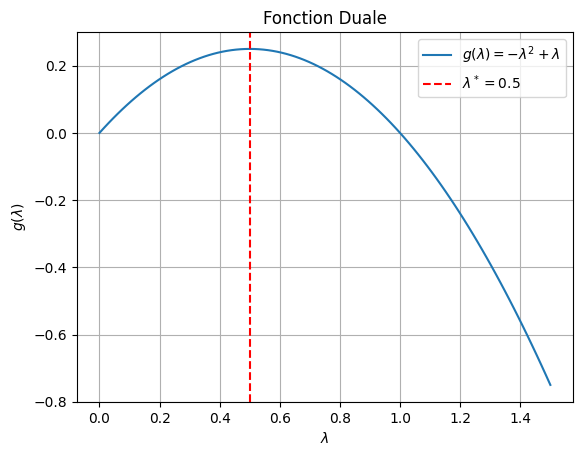

In [19]:
## 5. Tracé de la Fonction Duale et Solution $\lambda^*$
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction duale
def dual_function(lambda_):
    return -lambda_**2 + lambda_

# Créer une plage de valeurs de lambda
lambda_values = np.linspace(0, 1.5, 100)
g_values = dual_function(lambda_values)

# Tracer la fonction duale
plt.plot(lambda_values, g_values, label=r'$g(\lambda) = -\lambda^2 + \lambda$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$g(\lambda)$')
plt.title('Fonction Duale')
plt.axvline(x=0.5, color='r', linestyle='--', label=r'$\lambda^* = 0.5$')
plt.legend()
plt.grid()
plt.show()

# Nouvelle section

# Projet d'Optimisation Convexe Avancé

## 1. Forme Standard du Problème

Le problème d'optimisation est :

$$
\min_{\boldsymbol{\theta}} \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
$$

Sous les contraintes :

$$
\theta_1 + \theta_2 - 1 \leq 0
$$
$$
\theta_1 - \theta_2 - 1 \leq 0
$$
$$
-\theta_1 + \theta_2 - 1 \leq 0
$$
$$
-\theta_1 - \theta_2 - 1 \leq 0
$$

## 2. Fonction Lagrangienne Associée

La **fonction Lagrangienne** $L$ est définie comme :

$$
L(\theta_1, \theta_2, \lambda_1, \lambda_2, \lambda_3, \lambda_4) = \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2 + \lambda_1 (\theta_1 + \theta_2 - 1) + \lambda_2 (\theta_1 - \theta_2 - 1) + \lambda_3 (-\theta_1 + \theta_2 - 1) + \lambda_4 (-\theta_1 - \theta_2 - 1)
$$

Où :
- $\lambda_1, \lambda_2, \lambda_3, \lambda_4 \geq 0$ sont les multiplicateurs de Lagrange associés aux contraintes.

## 3. Conditions de KKT

Les **conditions de Karush-Kuhn-Tucker (KKT)** pour ce problème sont :

1. **Stationnarité** :
   $$
   \frac{\partial L}{\partial \theta_1} = (\theta_1 - 3) + \lambda_1 + \lambda_2 - \lambda_3 - \lambda_4 = 0
   $$
   $$
   \frac{\partial L}{\partial \theta_2} = (\theta_2 - 1) + \lambda_1 - \lambda_2 + \lambda_3 - \lambda_4 = 0
   $$

2. **Primal feasibility** :
   $$
   \theta_1 + \theta_2 - 1 \leq 0
   $$
   $$
   \theta_1 - \theta_2 - 1 \leq 0
   $$
   $$
   -\theta_1 + \theta_2 - 1 \leq 0
   $$
   $$
   -\theta_1 - \theta_2 - 1 \leq 0
   $$

3. **Dual feasibility** :
   $$
   \lambda_1, \lambda_2, \lambda_3, \lambda_4 \geq 0
   $$

4. **Complementary slackness** :
   $$
   \lambda_1 (\theta_1 + \theta_2 - 1) = 0
   $$
   $$
   \lambda_2 (\theta_1 - \theta_2 - 1) = 0
   $$
   $$
   \lambda_3 (-\theta_1 + \theta_2 - 1) = 0
   $$
   $$
   \lambda_4 (-\theta_1 - \theta_2 - 1) = 0
   $$

## 4. Fonction Duale et Problème Dual

La **fonction duale** est obtenue en minimisant le Lagrangien par rapport à $\theta_1$ et $\theta_2$, tout en traitant les multiplicateurs de Lagrange $\lambda_1, \lambda_2, \lambda_3, \lambda_4$ comme des paramètres fixes.

Le **problème dual** consiste à maximiser la fonction duale sous les contraintes de dual feasibility ($\lambda_i \geq 0$).

## 5. Résolution Numérique avec Python (CVXPY)

### Résultats Attendus

En exécutant ce code, vous devriez obtenir les valeurs optimales de $\theta_1$ et $\theta_2$, ainsi que la valeur minimale de la fonction objectif.

In [20]:
import cvxpy as cp

# Définir les variables d'optimisation
theta1 = cp.Variable()
theta2 = cp.Variable()

# Définir la fonction objectif
objective = cp.Minimize(0.5 * cp.square(theta1 - 3) + 0.5 * cp.square(theta2 - 1))

# Définir les contraintes
constraints = [
    theta1 + theta2 - 1 <= 0,
    theta1 - theta2 - 1 <= 0,
    -theta1 + theta2 - 1 <= 0,
    -theta1 - theta2 - 1 <= 0
]

# Formuler le problème
problem = cp.Problem(objective, constraints)

# Résoudre le problème
problem.solve()

# Afficher les résultats
print("Valeur optimale de theta1 :", theta1.value)
print("Valeur optimale de theta2 :", theta2.value)
print("Valeur minimale de la fonction objectif :", problem.value)

Valeur optimale de theta1 : 1.0
Valeur optimale de theta2 : -3.12482133476829e-31
Valeur minimale de la fonction objectif : 2.5


NumPy version : 2.0.2
CVXPY version : 1.6.4


# 2 - Problème plus évolué

# Projet d'Optimisation Convexe Avancé

## 1. Forme Standard du Problème

Le problème d'optimisation est :

$$
\min_{\boldsymbol{\theta}} \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
$$

Sous les contraintes :

$$
\theta_1 + \theta_2 - 1 \leq 0
$$
$$
\theta_1 - \theta_2 - 1 \leq 0
$$
$$
-\theta_1 + \theta_2 - 1 \leq 0
$$
$$
-\theta_1 - \theta_2 - 1 \leq 0
$$

En utilisant les notations matricielles :

$$
\boldsymbol{\theta} = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}, \quad \mathbf{c} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, \quad \mathbf{A} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ -1 & 1 \\ -1 & -1 \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
$$

Le problème peut être réécrit sous la forme matricielle :

$$
\min_{\boldsymbol{\theta}} \frac{1}{2} \|\boldsymbol{\theta} - \mathbf{c}\|_2^2
$$

Sous les contraintes :

$$
\mathbf{A} \boldsymbol{\theta} - \mathbf{b} \leq \mathbf{0}
$$

In [15]:
# Définir les matrices et vecteurs
c = np.array([3, 1])  # Vecteur c
b = np.ones(4)        # Vecteur b
A = np.array([        # Matrice A
    [1, 1],
    [1, -1],
    [-1, 1],
    [-1, -1]
])

## 2. Fonction Lagrangienne Associée

La **fonction Lagrangienne** est donnée par :

$$
\mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\mu}) = \frac{1}{2} \|\boldsymbol{\theta} - \mathbf{c}\|_2^2 + \boldsymbol{\mu}^\top (\mathbf{A} \boldsymbol{\theta} - \mathbf{b})
$$

Où :
- $\boldsymbol{\mu} \in \mathbb{R}^4$ est le vecteur des multiplicateurs de Lagrange.
- $\boldsymbol{\mu} \geq 0$.

## 3. Dérivées Utiles

1. **Dérivée de $\|\boldsymbol{\theta} - \mathbf{c}\|_2^2$** :

$$
\|\boldsymbol{\theta} - \mathbf{c}\|_2^2 = \boldsymbol{\theta}^\top \boldsymbol{\theta} - 2 \boldsymbol{\theta}^\top \mathbf{c} + \mathbf{c}^\top \mathbf{c}
$$

2. **Gradient de $\|\boldsymbol{\theta} - \mathbf{c}\|_2^2$** :

$$
\nabla_{\boldsymbol{\theta}} \|\boldsymbol{\theta} - \mathbf{c}\|_2^2 = 2(\boldsymbol{\theta} - \mathbf{c})
$$

## 4. Condition Stationnaire de KKT

La condition stationnaire de KKT impose que le gradient de $\mathcal{L}$ par rapport à $\boldsymbol{\theta}$ soit nul :

$$
\nabla_{\boldsymbol{\theta}} \mathcal{L} = (\boldsymbol{\theta} - \mathbf{c}) + \mathbf{A}^\top \boldsymbol{\mu} = 0
$$

Ainsi, la solution primale est :

$$
\boldsymbol{\theta} = \mathbf{c} - \mathbf{A}^\top \boldsymbol{\mu}
$$

## 5. Problème Dual

Le **problème dual** est :

$$
\min_{\boldsymbol{\mu}} \frac{1}{2} \boldsymbol{\mu}^\top \mathbf{H} \boldsymbol{\mu} + \boldsymbol{\mu}^\top \mathbf{q}
$$

Sous la contrainte :

$$
\boldsymbol{\mu} \geq 0
$$

Où :

$$
\mathbf{H} = \mathbf{A} \mathbf{A}^\top, \quad \mathbf{q} = -(\mathbf{A} \mathbf{c} - \mathbf{b})
$$

In [16]:
# ----------------------------------------------------------
# 2.2 Implémentation Numérique avec CVXPy
# ----------------------------------------------------------

## 2.2.1 Résolution du Problème Primal

# Définir les variables d'optimisation
theta = cp.Variable(2)  # θ est un vecteur de dimension 2

# Définir la fonction objectif
objective = cp.Minimize(0.5 * cp.sum_squares(theta - c))
Z
# Définir les contraintes
constraints = [A @ theta - b <= 0]

# Formuler le problème
primal = cp.Problem(objective, constraints)

# Résoudre le problème
primal.solve(verbose=False)

# Afficher les résultats
print("=== Résolution du Problème Primal ===")
print("Statut de la solution :", primal.status)
print("Solution primale optimale :", theta.value)
print("Valeur de la fonction objectif :", primal.value)

## 2.2.2 Résolution du Problème Dual

# Définir la matrice H et le vecteur q
H = A @ A.T  # H = A * A^T
q = -(A @ c - b)  # q = -(A * c - b)

# Définir les variables duales
mu = cp.Variable(4)  # μ est un vecteur de dimension 4

# Définir la fonction objectif duale
dual_objective = cp.Minimize(0.5 * cp.quad_form(mu, H) + q.T @ mu)

# Définir les contraintes duales
dual_constraints = [mu >= 0]

# Formuler le problème dual
dual = cp.Problem(dual_objective, dual_constraints)

# Résoudre le problème dual
dual.solve(verbose=False)

# Afficher les résultats
print("\\n=== Résolution du Problème Dual ===")
print("Statut de la solution duale :", dual.status)
print("Solution duale optimale :", mu.value)
print("Valeur de la fonction objectif duale :", dual.value)

=== Résolution du Problème Primal ===
Statut de la solution : optimal
Solution primale optimale : [ 1.00000000e+00 -3.12482133e-31]
Valeur de la fonction objectif : 2.5
\n=== Résolution du Problème Dual ===
Statut de la solution duale : optimal
Solution duale optimale : [ 1.50000000e+00  5.00000000e-01 -4.59528364e-23  1.72627977e-24]
Valeur de la fonction objectif duale : -2.5


# Projet d'Optimisation Convexe Avancé(Resolution par l'utilisation des Matrices)

## 2. A More Evolved Problem

Le problème d'optimisation est :

$$
\min_{\boldsymbol{\theta}} \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
$$

Sous les contraintes :

$$
\theta_1 + \theta_2 - 1 \leq 0
$$
$$
\theta_1 - \theta_2 - 1 \leq 0
$$
$$
-\theta_1 + \theta_2 - 1 \leq 0
$$
$$
-\theta_1 - \theta_2 - 1 \leq 0
$$

---

### 2.1 Dérivation Mathématique

#### 1. Réécriture du Problème en Composantes

Le problème peut être réécrit en utilisant les composantes \( \theta_1 \) et \( \theta_2 \) :

$$
\min_{\theta_1, \theta_2} \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
$$

Sous les contraintes :

$$
\theta_1 + \theta_2 \leq 1
$$
$$
\theta_1 - \theta_2 \leq 1
$$
$$
-\theta_1 + \theta_2 \leq 1
$$
$$
-\theta_1 - \theta_2 \leq 1
$$

---

#### 2. Fonction Lagrangienne Associée

La **fonction Lagrangienne** \( \mathcal{L} \) est donnée par :

$$
\mathcal{L}(\theta_1, \theta_2, \mu_1, \mu_2, \mu_3, \mu_4) = \frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2 + \mu_1 (\theta_1 + \theta_2 - 1) + \mu_2 (\theta_1 - \theta_2 - 1) + \mu_3 (-\theta_1 + \theta_2 - 1) + \mu_4 (-\theta_1 - \theta_2 - 1)
$$

Où :
- \( \mu_1, \mu_2, \mu_3, \mu_4 \geq 0 \) sont les multiplicateurs de Lagrange associés aux contraintes.

---

#### 3. Dérivées Utiles

1. **Dérivée de \( (\theta_1 - 3)^2 \)** :

$$
\frac{\partial}{\partial \theta_1} \left( \frac{1}{2} (\theta_1 - 3)^2 \right) = \theta_1 - 3
$$

2. **Dérivée de \( (\theta_2 - 1)^2 \)** :

$$
\frac{\partial}{\partial \theta_2} \left( \frac{1}{2} (\theta_2 - 1)^2 \right) = \theta_2 - 1
$$

---

#### 4. Condition Stationnaire de KKT

La condition stationnaire de KKT impose que le gradient de \( \mathcal{L} \) par rapport à \( \theta_1 \) et \( \theta_2 \) soit nul :

$$
\frac{\partial \mathcal{L}}{\partial \theta_1} = (\theta_1 - 3) + \mu_1 + \mu_2 - \mu_3 - \mu_4 = 0
$$
$$
\frac{\partial \mathcal{L}}{\partial \theta_2} = (\theta_2 - 1) + \mu_1 - \mu_2 + \mu_3 - \mu_4 = 0
$$

Ainsi, les équations stationnaires sont :

$$
\theta_1 = 3 - \mu_1 - \mu_2 + \mu_3 + \mu_4
$$
$$
\theta_2 = 1 - \mu_1 + \mu_2 - \mu_3 + \mu_4
$$

---

#### 5. Problème Dual

Le **problème dual** est obtenu en substituant \( \theta_1 \) et \( \theta_2 \) dans la fonction Lagrangienne et en simplifiant. Le problème dual est :

$$
\max_{\mu_1, \mu_2, \mu_3, \mu_4 \geq 0} g(\mu_1, \mu_2, \mu_3, \mu_4)
$$



---
